In [558]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns

In [559]:
df = pd.read_csv("HR-Employee-Attrition-Processed.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College Graduate,Life Sciences,Moderate Satisfaction,Female,...,Excellent Performance,Low Satisfaction,0,8,0,Poor Balance,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,High School or Below,Life Sciences,High Satisfaction,Male,...,Outstanding Performance,Very High Satisfaction,1,10,3,Better Balance,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College Graduate,Other,Very High Satisfaction,Male,...,Excellent Performance,Moderate Satisfaction,0,7,3,Better Balance,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master’s Degree,Life Sciences,Very High Satisfaction,Female,...,Excellent Performance,High Satisfaction,0,8,3,Better Balance,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,High School or Below,Medical,Low Satisfaction,Male,...,Excellent Performance,Very High Satisfaction,1,6,3,Better Balance,2,2,2,2


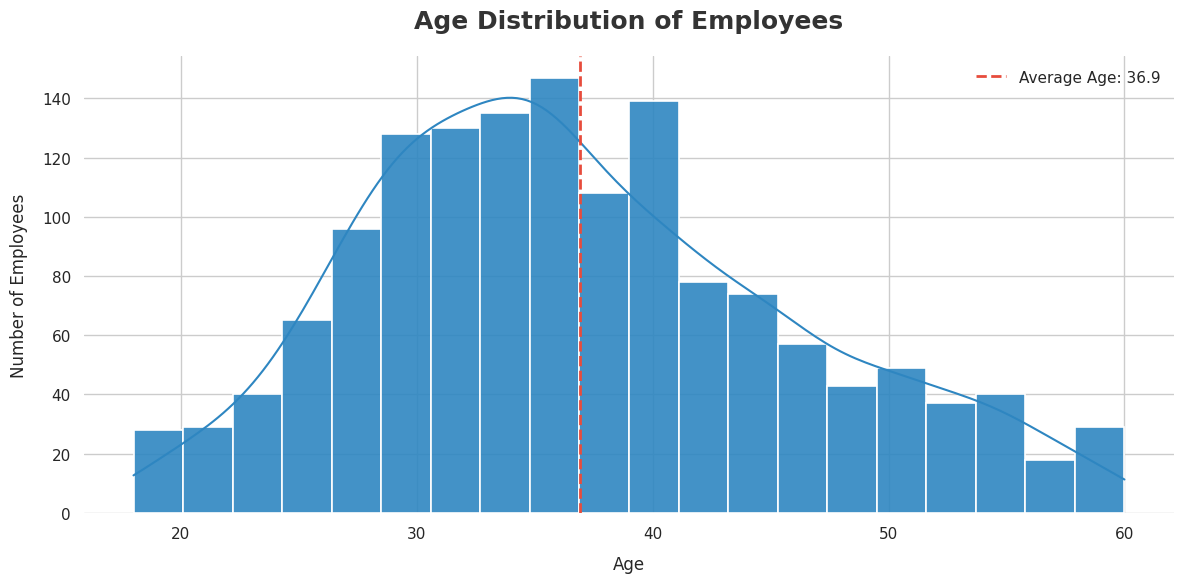

In [560]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(
    df["Age"],
    bins=20,
    kde=True,
    color="#2E86C1",
    edgecolor="white",
    linewidth=1.2,
    alpha=0.9
)
avg_age = df["Age"].mean()
plt.axvline(
    avg_age,
    color="#E74C3C",
    linestyle="--",
    linewidth=2,
    label=f"Average Age: {avg_age:.1f}"
)
plt.title("Age Distribution of Employees", fontsize=18, weight="bold", pad=20, color="#333333")
plt.xlabel("Age", fontsize=12, labelpad=10)
plt.ylabel("Number of Employees", fontsize=12, labelpad=10)
plt.legend(frameon=False, fontsize=11)
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()

In [561]:
att_counts = df['Attrition'].value_counts()
att_props = df['Attrition'].value_counts(normalize=True) * 100
colors = ['#2E86C1', '#E74C3C']
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=("Attrition Count", "Attrition Distribution (%)")
)
fig.add_trace(
    go.Bar(
        x=att_counts.index,
        y=att_counts.values,
        text=att_counts.values,
        textposition='outside',
        marker_color=colors,
        marker_line_color='white',
        marker_line_width=1.5,
        name='Attrition Count',
        opacity=0.9
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=att_props.index,
        values=att_props.values,
        textinfo='label+percent',
        marker=dict(colors=colors, line=dict(color='white', width=1.5)),
        name='Attrition Distribution',
        hole=0.3
    ),
    row=1, col=2
)

fig.update_layout(
    title=dict(
        text='Employee Attrition',
        x=0.5,
        font=dict(size=22, family='DejaVu Sans, Arial, sans-serif', color='#333')
    ),
    template='plotly_white',
    plot_bgcolor='#F9FAFB',
    paper_bgcolor='#F9FAFB',
    font=dict(family='DejaVu Sans, Arial, sans-serif', size=11, color='#2E2E2E'),
    showlegend=False,
    height=500,
    width=900,
)
fig.show()

The dataset includes 1,470 employees. The Attrition rate is 16.1%, meaning 237 individuals left the company, while the vast majority (83.9%, or 1,233 people) stayed. Our next step is to use visualizations to identify the key characteristics of this minority group that left and the reasons behind their decision.

Average Age: The typical employee is 36.9 years old.

Core Workforce: The largest concentration of employees is in their 30s and early 40s (roughly 27 to 45).

Overall Range: Employee ages span from the late teens to 60 years old.

In [562]:
bt_counts = df["BusinessTravel"].value_counts()
bt_attrition = df[df["Attrition"] == "Yes"]["BusinessTravel"].value_counts()

attrition_rate = np.floor((bt_attrition / bt_counts) * 100)

pie_colors = ['#2E86C1', '#5DADE2', '#AED6F1']
bar_colors = ['#E74C3C', '#F1948A', '#F5B7B1']

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "pie"}, {"type": "bar"}]],
    subplot_titles=("Employees by Business Travel", "Attrition by Business Travel")
)
fig.add_trace(
    go.Pie(
        labels=bt_counts.index,
        values=bt_counts.values,
        textinfo="label+percent",
        hole=0.4,
        marker=dict(colors=pie_colors, line=dict(color="white", width=1.5)),
        name="Business Travel"
    ),
    row=1, col=1
)
fig.add_trace(
    go.Bar(
        x=bt_attrition.index,
        y=bt_attrition.values,
        text=[f"{v} ({int(r)}%)" for v, r in zip(bt_attrition.values, attrition_rate)],
        textposition="outside",
        marker_color=bar_colors,
        marker_line_color="white",
        marker_line_width=1.2,
        name="Attrition Count",
        opacity=0.9
    ),
    row=1, col=2
)

fig.update_layout(
    title=dict(
        text="Attrition by Business Travel",
        x=0.5,
        font=dict(size=20, family="DejaVu Sans, Arial, sans-serif", color="#333333")
    ),
    template="plotly_white",
    plot_bgcolor="#F9FAFB",
    paper_bgcolor="#F9FAFB",
    font=dict(family="DejaVu Sans, Arial, sans-serif", size=12, color="#2E2E2E"),
    showlegend=False,
    height=500,
    width=950,
    margin=dict(t=70, b=40, l=40, r=40)
)

fig.update_xaxes(title_text="Business Travel", row=1, col=2)
fig.update_yaxes(title_text="Number of Employees", row=1, col=2)

fig.show()


The majority of employees ($\mathbf{71\%}$) Travel Rarely, and this group also accounts for the largest number of total employee departures ($\mathbf{156}$ leavers).However, the highest risk is among the much smaller group who Travel Frequently. They have a severely elevated attrition rate ($\mathbf{24\%}$), indicating frequent travel is a strong trigger for employees deciding to leave.

In [563]:
dept_total = df['Department'].value_counts().sort_index()
tcolor = '#2E86C1'
fig = go.Figure(
    go.Bar(
        x=dept_total.index,
        y=dept_total.values,
        text=dept_total.values,
        textposition='outside',
        marker_color=tcolor,
        marker_line_color='white',
        marker_line_width=1.5,
        opacity=0.9,
        name='Total Employees'
    )
)
fig.update_layout(
    title=dict(
        text="Total Employees by Department",
        x=0.5,
        font=dict(size=22, family='DejaVu Sans, Arial, sans-serif', color='#333333', weight='bold')
    ),
    xaxis_title='Department',
    yaxis_title='Number of Employees',
    template='plotly_white',
    plot_bgcolor='#F9FAFB',
    paper_bgcolor='#F9FAFB',
    font=dict(family='DejaVu Sans, Arial, sans-serif', size=12, color='#2E2E2E'),
    bargap=0.25,
    showlegend=False,
    height=500,
    width=750,
    margin=dict(t=70, b=50, l=40, r=40)
)
fig.show()

In [564]:
dept_attrition = df[df['Attrition'] == 'Yes']['Department'].value_counts()
colors = ['#2E86C1', '#E74C3C', '#1E9D88']

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]],
    subplot_titles=("Attrition Count by Department", "Attrition Distribution (%)")
)
fig.add_trace(
    go.Bar(
        x=dept_attrition.index,
        y=dept_attrition.values,
        text=dept_attrition.values,
        textposition='outside',
        marker_color=colors,
        marker_line_color='white',
        marker_line_width=1.5,
        opacity=0.9,
        name='Attrition = Yes'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=dept_attrition.index,
        values=dept_attrition.values,
        hole=0.4,
        marker=dict(colors=colors, line=dict(color='white', width=2)),
        textinfo='label+percent',
        textfont=dict(size=12, family='DejaVu Sans, Arial, sans-serif', color='#2E2E2E'),
        pull=[0.05 if i == dept_attrition.values.argmax() else 0 for i in range(len(dept_attrition))],
        name='Attrition Distribution'
    ),
    row=1, col=2
)
fig.update_layout(
    title=dict(
        text='Attrition by Department',
        x=0.5,
        font=dict(size=22, family='DejaVu Sans, Arial, sans-serif', color='#333333')
    ),
    xaxis_title='Department',
    yaxis_title='Number of Employees (Attrition = Yes)',
    template='plotly_white',
    plot_bgcolor='#F9FAFB',
    paper_bgcolor='#F9FAFB',
    font=dict(family='DejaVu Sans, Arial, sans-serif', size=12, color='#2E2E2E'),
    showlegend=False,
    height=500,
    width=950,
    margin=dict(t=80, b=50, l=40, r=40)
)
fig.show()

The Research & Development department has the highest number of total employees (largest headcount).

The Sales department has the highest attrition rate (the highest percentage of its own employees leaving).

Despite being the largest department, Research & Development has the lowest attrition rate of all departments (employees in R&D are most likely to stay).

The Human Resources department also shows a concerningly high attrition rate.

In [565]:
attrition_yes = education_attrition[education_attrition['Attrition'] == 'Yes']
attrition_yes = attrition_yes.sort_values(by='AttritionRate', ascending=False)
attrition_yes['Education'] = pd.Categorical(
    attrition_yes['Education'],
    categories=attrition_yes['Education'],
    ordered=True
)

fig = px.bar(
    attrition_yes,
    x='Education',
    y='AttritionRate',
    text=attrition_yes['AttritionRate'].apply(lambda x: f"{x:.1f}%"),
    color_discrete_sequence=['#E74C3C'],
    title='Employee Attrition Rate by Education'
)

fig.update_traces(
    textposition='outside',
    marker_line_color='white',
    marker_line_width=1.5,
    opacity=0.9,
    showlegend=False
)
fig.update_layout(
    title=dict(
        text='Attrition Rate by Education',
        x=0.5,
        y=0.95,
        font=dict(size=22, family='DejaVu Sans, Arial, sans-serif', color='#333333')
    ),
    xaxis_title='Education Level',
    yaxis_title='Attrition Rate',
    template='plotly_white',
    plot_bgcolor='#F9FAFB',
    paper_bgcolor='#F9FAFB',
    font=dict(family='DejaVu Sans, Arial, sans-serif', size=12, color='#2E2E2E'),
    bargap=0.25,
    height=550,
    width=950,
    margin=dict(t=110, b=60, l=40, r=40)
)
fig.show()

In [566]:
edu_field_yes = df[df['Attrition'] == 'Yes'].groupby('EducationField', as_index=False).size().rename(columns={'size':'Count'})
edu_field_total = df.groupby('EducationField', as_index=False).size().rename(columns={'size':'Total'})
edu_field_yes = edu_field_yes.merge(edu_field_total, on='EducationField')
edu_field_yes['AttritionRate'] = edu_field_yes['Count'] / edu_field_yes['Total'] * 100

edu_field_yes = edu_field_yes.sort_values(by='AttritionRate', ascending=False)

# Preserve order on x-axis
edu_field_yes['EducationField'] = pd.Categorical(
    edu_field_yes['EducationField'],
    categories=edu_field_yes['EducationField'],
    ordered=True
)

# Create bar chart
fig1 = px.bar(
    edu_field_yes,
    x='EducationField',
    y='AttritionRate',  # Y-axis shows attrition rate
    text=edu_field_yes['AttritionRate'].apply(lambda x: f"{x:.1f}%"),
    color_discrete_sequence=['#E74C3C'],
    title='Attrition Rate by Education Field'
)

fig1.update_traces(
    textposition='outside',
    marker_line_color='white',
    marker_line_width=1.5,
    opacity=0.9,
    showlegend=False
)

fig1.update_layout(
    xaxis_title='Education Field',
    yaxis_title='Attrition Rate',
    template='plotly_white',
    plot_bgcolor='#F9FAFB',
    paper_bgcolor='#F9FAFB',
    font=dict(family='DejaVu Sans, Arial, sans-serif', size=12, color='#2E2E2E'),
    bargap=0.25,
    height=550,
    width=850
)
fig1.show()

In [567]:
env_sat_yes = df[df['Attrition'] == 'Yes'].groupby('EnvironmentSatisfaction', as_index=False).size().rename(columns={'size':'Count'})
env_sat_total = df.groupby('EnvironmentSatisfaction', as_index=False).size().rename(columns={'size':'Total'})
env_sat_yes = env_sat_yes.merge(env_sat_total, on='EnvironmentSatisfaction')
env_sat_yes['AttritionRate'] = env_sat_yes['Count'] / env_sat_yes['Total'] * 100
env_sat_yes = env_sat_yes.sort_values(by='AttritionRate', ascending=False)

env_sat_yes['EnvironmentSatisfaction'] = pd.Categorical(
    env_sat_yes['EnvironmentSatisfaction'],
    categories=env_sat_yes['EnvironmentSatisfaction'],
    ordered=True
)
fig2 = px.bar(
    env_sat_yes,
    x='EnvironmentSatisfaction',
    y='AttritionRate',
    text=env_sat_yes['AttritionRate'].apply(lambda x: f"{x:.1f}%"),
    color_discrete_sequence=['#E74C3C'],
    title='Attrition Rate by Environment Satisfaction'
)
fig2.update_traces(
    textposition='outside',
    marker_line_color='white',
    marker_line_width=1.5,
    opacity=0.9,
    showlegend=False
)
fig2.update_layout(
    xaxis_title='Environment Satisfaction',
    yaxis_title='Attrition Rate',
    template='plotly_white',
    plot_bgcolor='#F9FAFB',
    paper_bgcolor='#F9FAFB',
    font=dict(family='DejaVu Sans, Arial, sans-serif', size=12, color='#2E2E2E'),
    bargap=0.25,
    height=550,
    width=850
)
fig2.show()

In [568]:
joblevel_attrition = df[df['Attrition'] == 'Yes'].groupby('JobLevel', as_index=False).size().rename(columns={'size':'Count'})
joblevel_total = df.groupby('JobLevel', as_index=False).size().rename(columns={'size':'Total'})
joblevel_attrition = joblevel_attrition.merge(joblevel_total, on='JobLevel')
joblevel_attrition['AttritionRate'] = joblevel_attrition['Count'] / joblevel_attrition['Total'] * 100
joblevel_attrition = joblevel_attrition.sort_values(by='AttritionRate', ascending=False)

joblevel_attrition['JobLevel'] = pd.Categorical(
    joblevel_attrition['JobLevel'],
    categories=joblevel_attrition['JobLevel'],
    ordered=True
)

fig = px.bar(
    joblevel_attrition,
    x='JobLevel',
    y='AttritionRate',
    text=joblevel_attrition['AttritionRate'].apply(lambda x: f"{x:.1f}%"),
    color_discrete_sequence=['#E74C3C'],
    title='Attrition Rate by Job Level'
)

fig.update_traces(
    textposition='outside',
    marker_line_color='white',
    marker_line_width=1.5,
    opacity=0.9,
    showlegend=False
)

fig.update_layout(
    template='plotly_white',
    xaxis_title='Job Level',
    yaxis_title='Attrition Rate',
    bargap=0.25,
    height=550,
    width=850
)

fig.show()

In [569]:
job_attrition = df.groupby(['JobRole', 'Attrition'], as_index=False).size().rename(columns={'size':'Count'})

job_attrition_yes = job_attrition[job_attrition['Attrition'] == 'Yes']

job_total = df.groupby('JobRole', as_index=False).size().rename(columns={'size':'Total'})
job_attrition_yes = job_attrition_yes.merge(job_total, on='JobRole')

job_attrition_yes['AttritionRate'] = job_attrition_yes['Count'] / job_attrition_yes['Total'] * 100

job_attrition_yes = job_attrition_yes.sort_values(by='AttritionRate', ascending=False)
job_attrition_yes['JobRole'] = pd.Categorical(job_attrition_yes['JobRole'], categories=job_attrition_yes['JobRole'], ordered=True)

fig = px.bar(
    job_attrition_yes,
    x='JobRole',
    y='AttritionRate',
    text=job_attrition_yes['AttritionRate'].apply(lambda x: f"{x:.1f}%"),
    color_discrete_sequence=['#E74C3C'],
    title='Attrition Rate by Job Role'
)

fig.update_traces(
    textposition='outside',
    marker_line_color='white',
    marker_line_width=1.5,
    opacity=0.9,
    showlegend=False
)

fig.update_layout(
    xaxis_title='Job Role',
    yaxis_title='Attrition Rate',
    template='plotly_white',
    plot_bgcolor='#F9FAFB',
    paper_bgcolor='#F9FAFB',
    font=dict(family='DejaVu Sans, Arial, sans-serif', size=12, color='#2E2E2E'),
    height=550,
    width=950,
    margin=dict(t=110, b=60, l=40, r=40)
)
fig.show()

In [570]:
avg_salary_role = (
    df.groupby("JobRole", as_index=False)["MonthlyIncome"]
      .mean()
      .sort_values(by="MonthlyIncome", ascending=False)
)
fig = px.bar(
    avg_salary_role,
    x="JobRole",
    y="MonthlyIncome",
    text=avg_salary_role["MonthlyIncome"].apply(lambda x: f"${x:,.0f}"),
    color="MonthlyIncome",
    color_continuous_scale="Viridis",
    title="Average Monthly Salary by Job Role"
)

fig.update_traces(
    textposition="outside",
    marker_line_color="white",
    marker_line_width=1.5,
    opacity=0.9
)
fig.update_layout(
    title=dict(
        x=0.5,
        font=dict(size=22, family="Poppins, Arial, sans-serif", color="#222")
    ),
    xaxis_title="Job Role",
    yaxis_title="Average Monthly Income",
    plot_bgcolor="#F9FAFB",
    paper_bgcolor="#F9FAFB",
    font=dict(family="Poppins, Arial, sans-serif", size=12, color="#333"),
    coloraxis_showscale=False,
    margin=dict(t=90, b=60, l=40, r=40),
    height=550,
    width=950
)
fig.show()

In [571]:
job_satis_attrition = df[df['Attrition'] == 'Yes'].groupby('JobSatisfaction', as_index=False).size().rename(columns={'size':'Count'})

job_satis_total = df.groupby('JobSatisfaction', as_index=False).size().rename(columns={'size':'Total'})
job_satis_attrition = job_satis_attrition.merge(job_satis_total, on='JobSatisfaction')

job_satis_attrition['AttritionRate'] = job_satis_attrition['Count'] / job_satis_attrition['Total'] * 100

job_satis_attrition = job_satis_attrition.sort_values(by='AttritionRate', ascending=False)

job_satis_attrition['JobSatisfaction'] = pd.Categorical(
    job_satis_attrition['JobSatisfaction'],
    categories=job_satis_attrition['JobSatisfaction'],
    ordered=True
)

fig = px.bar(
    job_satis_attrition,
    x='JobSatisfaction',
    y='AttritionRate',
    text=job_satis_attrition['AttritionRate'].apply(lambda x: f"{x:.1f}%"),
    color_discrete_sequence=['#E74C3C'],
    title='Attrition Rate by Job Satisfaction'
)

fig.update_traces(
    textposition='outside',
    marker_line_color='white',
    marker_line_width=1.5,
    opacity=0.9,
    showlegend=False
)

fig.update_layout(
    template='plotly_white',
    xaxis_title='Job Satisfaction',
    yaxis_title='Attrition Rate (%)',
    bargap=0.25,
    height=550,
    width=850
)

fig.show()

In [572]:
fig = px.box(
    df,
    x="Attrition",
    y="MonthlyIncome",
    color="Attrition",
    color_discrete_map={"Yes": "#E74C3C", "No": "#2E86C1"},
    points="all",
    title="Monthly Income by Attrition Status"
)

fig.update_layout(
    title=dict(
        text="Monthly Income by Attrition Status",
        x=0.5,
        font=dict(size=22, color="#222", family="Poppins, Arial, sans-serif")
    ),
    xaxis_title="Attrition Status",
    yaxis_title="Monthly Income",
    plot_bgcolor="#F9FAFB",
    paper_bgcolor="#F9FAFB",
    font=dict(size=13, color="#2E2E2E", family="Poppins, Arial, sans-serif"),
    boxmode="group",
    showlegend=False,
    margin=dict(t=90, l=60, r=50, b=70),
    height=550,
    width=950
)

fig.update_traces(
    marker=dict(size=5, opacity=0.5, line=dict(width=0)),
    line=dict(width=2),
    fillcolor="rgba(255,255,255,0.6)",
    boxmean=True,
)

fig.update_yaxes(
    showgrid=True,
    gridwidth=0.5,
    gridcolor="rgba(0,0,0,0.1)",
    zeroline=False
)

fig.show()

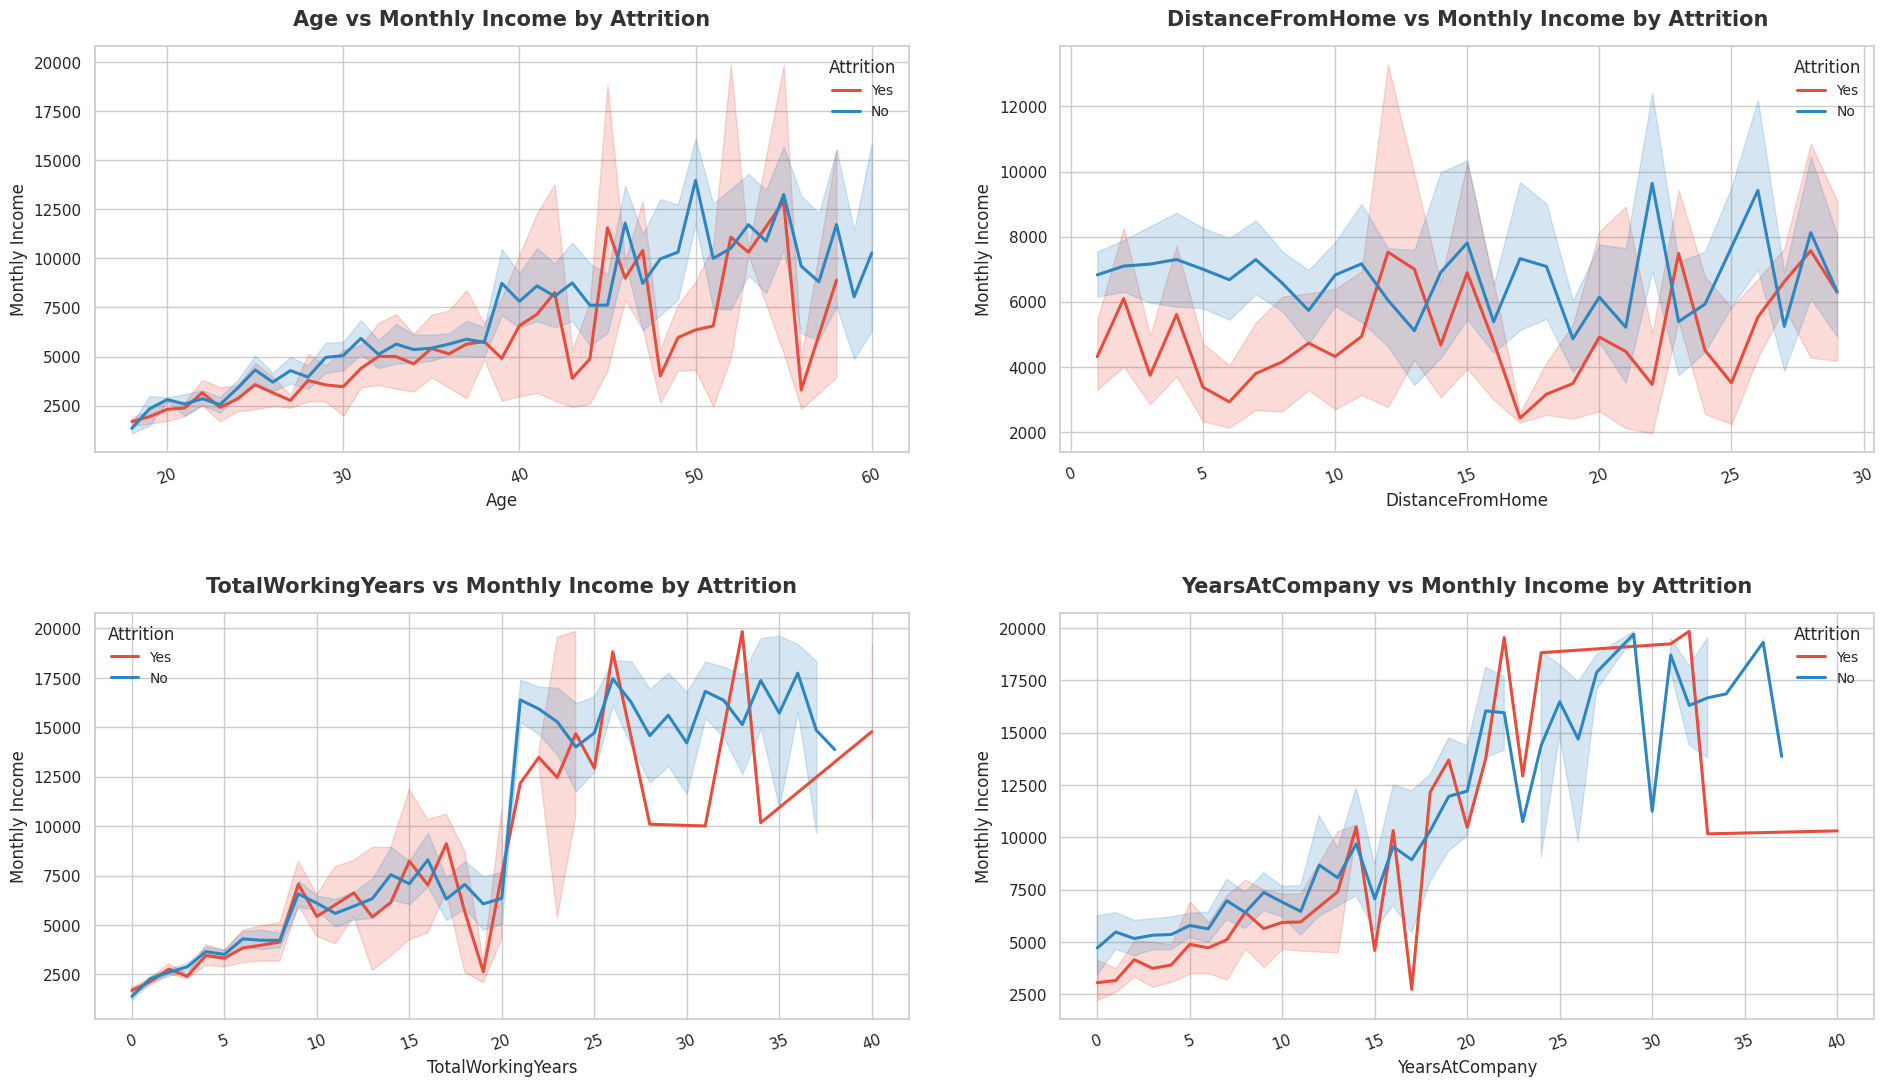

In [573]:
sns.set_theme(style="whitegrid")
attrition_palette = {"Yes": "#E74C3C", "No": "#2E86C1"}
selected_cols = ['Age', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany']
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for idx, col in enumerate(selected_cols):
    sns.lineplot(
        data=df,
        x=col,
        y='MonthlyIncome',
        hue='Attrition',
        palette=attrition_palette,
        ax=axes[idx],
        linewidth=2.2
    )

    axes[idx].set_title(f"{col} vs Monthly Income by Attrition",
                        fontsize=15, weight='bold', color='#333333', pad=15)
    axes[idx].set_xlabel(col, fontsize=12)
    axes[idx].set_ylabel("Monthly Income", fontsize=12)
    axes[idx].tick_params(axis='x', rotation=20)
    axes[idx].legend(title="Attrition", frameon=False, fontsize=10)
plt.tight_layout(pad=4)
plt.show()

In [574]:
worklife_attrition = df[df['Attrition'] == 'Yes'].groupby('WorkLifeBalance', as_index=False).size().rename(columns={'size':'Count'})
worklife_total = df.groupby('WorkLifeBalance', as_index=False).size().rename(columns={'size':'Total'})
worklife_attrition = worklife_attrition.merge(worklife_total, on='WorkLifeBalance')
worklife_attrition['AttritionRate'] = worklife_attrition['Count'] / worklife_attrition['Total'] * 100
worklife_attrition = worklife_attrition.sort_values(by='Count', ascending=False)

fig_worklife = px.bar(
    worklife_attrition,
    x='WorkLifeBalance',
    y='Count',
    text=worklife_attrition['AttritionRate'].apply(lambda x: f"{x:.1f}%"),
    color_discrete_sequence=['#E74C3C'],
    title='Attrition by Work Life Balance'
)
fig_worklife.update_traces(textposition='outside', marker_line_color='white', marker_line_width=1.5, opacity=0.9)
fig_worklife.update_layout(template='plotly_white', xaxis_title='Work Life Balance', yaxis_title='Number of Employees (Attrition)')
fig_worklife.show()

In [575]:
rel_attrition = df[df['Attrition'] == 'Yes'].groupby('RelationshipSatisfaction', as_index=False).size().rename(columns={'size':'Count'})

rel_total = df.groupby('RelationshipSatisfaction', as_index=False).size().rename(columns={'size':'Total'})
rel_attrition = rel_attrition.merge(rel_total, on='RelationshipSatisfaction')

rel_attrition['AttritionRate'] = rel_attrition['Count'] / rel_attrition['Total'] * 100
rel_attrition = rel_attrition.sort_values(by='Count', ascending=False)

fig = px.bar(
    rel_attrition,
    x='RelationshipSatisfaction',
    y='Count',
    text=rel_attrition['AttritionRate'].apply(lambda x: f"{x:.1f}%"),
    color_discrete_sequence=['#E74C3C'],
    title='Attrition by Relationship Satisfaction'
)

fig.update_traces(textposition='outside', marker_line_color='white', marker_line_width=1.5, opacity=0.9)
fig.update_layout(
    template='plotly_white',
    xaxis_title='Relationship Satisfaction',
    yaxis_title='Number of Employees (Attrition)',
    bargap=0.25,
    height=550,
    width=850
)
fig.show()

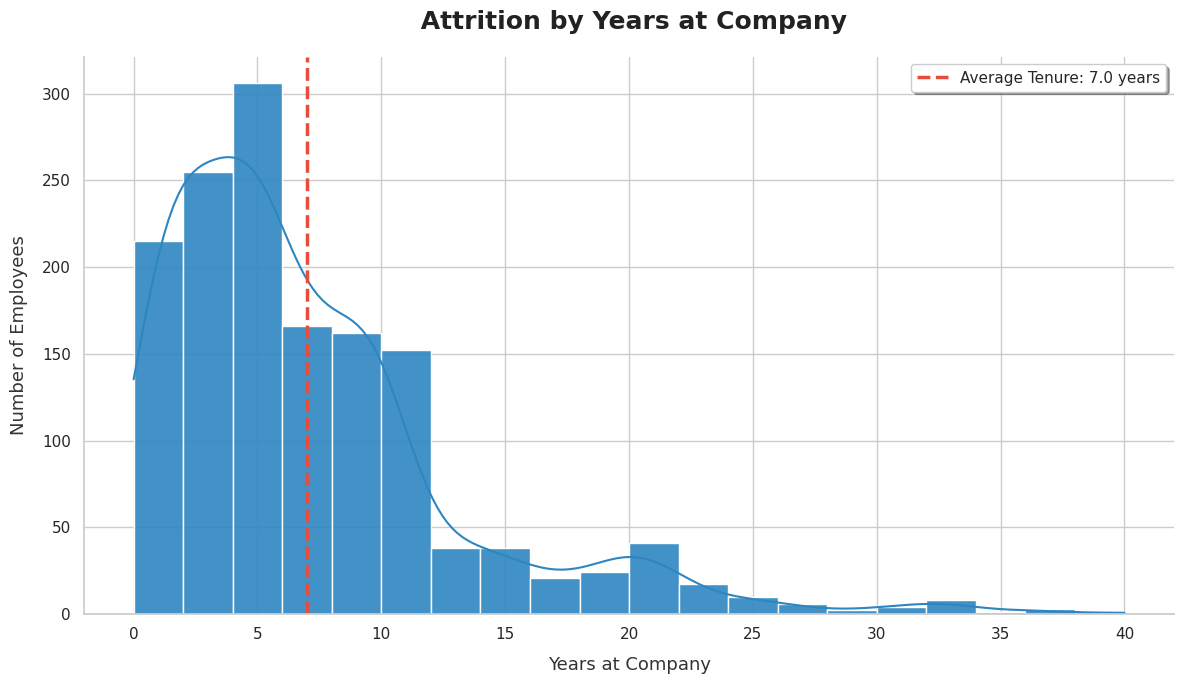

In [576]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

sns.histplot(
    data=df,
    x="YearsAtCompany",
    color="#2E86C1",
    kde=True,
    bins=20,
    edgecolor='white',
    alpha=0.9
)

average_YAC = df["YearsAtCompany"].mean()
plt.axvline(
    average_YAC,
    color="#E74C3C",
    linestyle="--",
    linewidth=2.5,
    label=f"Average Tenure: {average_YAC:.1f} years"
)


plt.title(
    " Attrition by Years at Company",
    fontsize=18,
    weight='bold',
    pad=20,
    color='#222222',
    family='DejaVu Sans'
)
plt.xlabel("Years at Company", fontsize=13, labelpad=10, color='#333333')
plt.ylabel("Number of Employees", fontsize=13, labelpad=10, color='#333333')

plt.legend(
    frameon=True,
    shadow=True,
    fontsize=11,
    loc="upper right"
)
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

In [578]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr().round(2)

fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='Blues',
    aspect='auto',
    labels=dict(color="Correlation"),
    title='Correlation Heatmap'
)

fig.update_layout(
    template='plotly_white',
    title=dict(
        x=0.5,
        y=0.95,
        font=dict(size=22, family='DejaVu Sans, Arial, sans-serif', color='#333333')
    ),
    font=dict(family='DejaVu Sans, Arial, sans-serif', size=12, color='#2E2E2E'),
    width=900,
    height=800
)
fig.update_traces(text= np.round(corr_matrix.values, 2), texttemplate="%{text:.2f}")
fig.show()

EDA Conclusions
Categorical Variables

Analyzing the categorical variables, we observe that most employees who left the company were from the Research & Development (R&D) department, primarily working as laboratory technicians, sales executives, or research scientists.

Interestingly, these employees generally had excellent performance ratings, which makes losing them particularly concerning.

Most had a Bachelor’s degree, with their education fields mainly in Life Sciences, Medical, or Marketing.

Despite displaying high job involvement, job satisfaction, and work-life balance, a significant number reported low satisfaction with the work environment. This highlights a critical area for improvement, particularly for R&D personnel.

Key Questions:

How can we improve the work environment?

What specific changes should be made for R&D staff to enhance retention and engagement?

Numerical Variables

From the numerical analysis:

Age: Younger employees, especially those 25–35 years old, are more likely to leave, while older employees tend to stay.

Tenure: Employees with more years of total experience, longer tenure at the company, and more years in their current role are less likely to leave.

Income: Those with lower monthly incomes (around $2,000–$3,000) and smaller salary increases tend to leave more frequently.

Overall, employees who leave are typically early in their careers, with less than 10 years of total work experience and often less than 2 years under their current manager.

This aligns with the previous observation about low satisfaction with the work environment and raises important questions:

Are some managers struggling to maintain strong team relationships?

Are we providing adequate training and support for managers to foster positive work environments?

How can we improve manager–team interactions to reduce attrition?